<a href="https://colab.research.google.com/github/abhisekde96/fii-pro-analysis/blob/main/direct.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [178]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import pytz

In [179]:
dates_list = []

# Get current time in IST timezone
ist_timezone = pytz.timezone('Asia/Kolkata')
current_time = datetime.now(ist_timezone)

# Check if current time has crossed 9 PM
if current_time.hour >= 21:  # 21 is 9 PM in 24-hour format
    # If it has crossed 9 PM, today's date is considered
    today = current_time.date()
else:
    # If it hasn't crossed 9 PM, consider yesterday's date as today's date
    today = current_time.date() - timedelta(days=1)

# Format and append today's date to the list if it's not a weekend
if today.weekday() < 5:  # Monday is 0, Sunday is 6
    dates_list.append(today.strftime('%d%m%Y'))

# Iterate over the last 7 days
for i in range(1, 8):
    # Calculate the date for the current iteration
    date = today - timedelta(days=i)
    # Convert the date to a datetime object with midnight time
    date_midnight = datetime.combine(date, datetime.min.time())
    # Convert the datetime to IST timezone
    date_midnight_ist = ist_timezone.localize(date_midnight)
    # Check if the date is not a weekend
    if date_midnight_ist.weekday() < 5:  # Monday is 0, Sunday is 6
        # Format and append the date to the list
        dates_list.append(date.strftime('%d%m%Y'))

In [180]:
t0 = pd.read_csv('http://archives.nseindia.com/content/nsccl/fao_participant_oi_{}.csv'.format(dates_list[0]), header = 1)
t1 = pd.read_csv('http://archives.nseindia.com/content/nsccl/fao_participant_oi_{}.csv'.format(dates_list[1]), header = 1)
t2 = pd.read_csv('http://archives.nseindia.com/content/nsccl/fao_participant_oi_{}.csv'.format(dates_list[2]), header = 1)
t3 = pd.read_csv('http://archives.nseindia.com/content/nsccl/fao_participant_oi_{}.csv'.format(dates_list[3]), header = 1)
t4 = pd.read_csv('http://archives.nseindia.com/content/nsccl/fao_participant_oi_{}.csv'.format(dates_list[4]), header = 1)
t5 = pd.read_csv('http://archives.nseindia.com/content/nsccl/fao_participant_oi_{}.csv'.format(dates_list[5]), header = 1)

In [181]:
t0 = t0.iloc[2:4,[0,5,6,7,8]]
t0.set_index('Client Type', inplace = True)
t0['c0'] = t0['Option Index Call Long']-t0['Option Index Call Short']
t0['p0'] = t0['Option Index Put Long']-t0['Option Index Put Short']
t0 = t0.iloc[:,[4,5]]

In [182]:
t1 = t1.iloc[2:4,[0,5,6,7,8]]
t1.set_index('Client Type', inplace = True)
t1['c1'] = t1['Option Index Call Long']-t1['Option Index Call Short']
t1['p1'] = t1['Option Index Put Long']-t1['Option Index Put Short']
t1 = t1.iloc[:,[4,5]]

In [183]:
t2 = t2.iloc[2:4,[0,5,6,7,8]]
t2.set_index('Client Type', inplace = True)
t2['c2'] = t2['Option Index Call Long']-t2['Option Index Call Short']
t2['p2'] = t2['Option Index Put Long']-t2['Option Index Put Short']
t2 = t2.iloc[:,[4,5]]

In [184]:
t3 = t3.iloc[2:4,[0,5,6,7,8]]
t3.set_index('Client Type', inplace = True)
t3['c3'] = t3['Option Index Call Long']-t3['Option Index Call Short']
t3['p3'] = t3['Option Index Put Long']-t3['Option Index Put Short']
t3 = t3.iloc[:,[4,5]]

In [185]:
t4 = t4.iloc[2:4,[0,5,6,7,8]]
t4.set_index('Client Type', inplace = True)
t4['c4'] = t4['Option Index Call Long']-t4['Option Index Call Short']
t4['p4'] = t4['Option Index Put Long']-t4['Option Index Put Short']
t4 = t4.iloc[:,[4,5]]

In [187]:
t_all = pd.concat([t0,t1,t2,t3,t4], axis = 1)

In [188]:
calls = pd.concat([t_all['c0'],t_all['c1'],t_all['c2'],t_all['c3'],t_all['c4']], axis = 1)

In [189]:
puts = pd.concat([t_all['p0'],t_all['p1'],t_all['p2'],t_all['p3'],t_all['p4']], axis = 1)

In [190]:
fii_puts = puts.iloc[0]
fii_calls = calls.iloc[0]
pro_puts = puts.iloc[1]
pro_calls = calls.iloc[1]

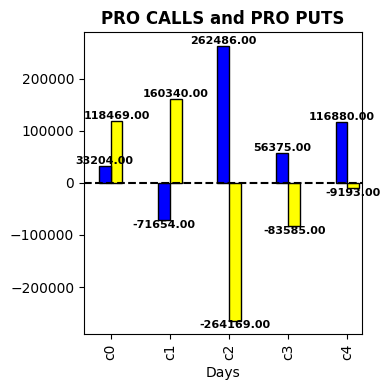

In [191]:

fig, ax = plt.subplots(figsize=(4, 4))  # Adjust the figure size as needed

# Plot pro_puts
pro_puts.plot(kind='bar', color='yellow', edgecolor='black', ax=ax, width=0.2, position=0)

# Plot pro_calls
pro_calls.plot(kind='bar', color='blue', edgecolor='black', ax=ax, width=0.2, position=1)

ax.set_title('PRO CALLS and PRO PUTS', fontweight='bold')
ax.set_xlabel('Days')

ax.axhline(y=0, color='black', linestyle='--')

# Annotate pro_puts bars
for bar in ax.patches[:len(pro_puts)]:
    height = bar.get_height()
    va = 'bottom' if height >= 0 else 'top'
    ax.text(bar.get_x() + bar.get_width() / 2,
            height,
            f'{height:.2f}',
            ha='center',
            va=va,
            fontsize=8,
            color='black',
            fontweight='bold')

# Annotate pro_calls bars
for bar in ax.patches[len(pro_puts):]:
    height = bar.get_height()
    va = 'bottom' if height >= 0 else 'top'
    ax.text(bar.get_x() + bar.get_width() / 2,
            height,
            f'{height:.2f}',
            ha='center',
            va=va,
            fontsize=8,
            color='black',
            fontweight='bold')

plt.tight_layout()
plt.show()

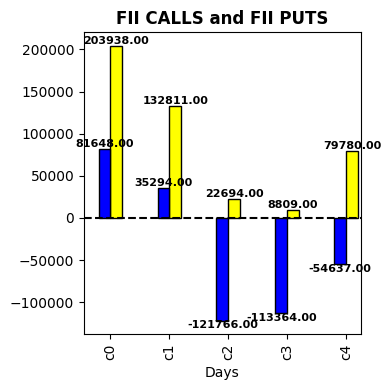

In [192]:

fig, ax = plt.subplots(figsize=(4, 4))  # Adjust the figure size as needed

# Plot pro_puts
fii_puts.plot(kind='bar', color='yellow', edgecolor='black', ax=ax, width=0.2, position=0)

# Plot pro_calls
fii_calls.plot(kind='bar', color='blue', edgecolor='black', ax=ax, width=0.2, position=1)

ax.set_title('FII CALLS and FII PUTS', fontweight='bold')
ax.set_xlabel('Days')

ax.axhline(y=0, color='black', linestyle='--')

# Annotate pro_puts bars
for bar in ax.patches[:len(pro_puts)]:
    height = bar.get_height()
    va = 'bottom' if height >= 0 else 'top'
    ax.text(bar.get_x() + bar.get_width() / 2,
            height,
            f'{height:.2f}',
            ha='center',
            va=va,
            fontsize=8,
            color='black',
            fontweight='bold')

# Annotate pro_calls bars
for bar in ax.patches[len(pro_puts):]:
    height = bar.get_height()
    va = 'bottom' if height >= 0 else 'top'
    ax.text(bar.get_x() + bar.get_width() / 2,
            height,
            f'{height:.2f}',
            ha='center',
            va=va,
            fontsize=8,
            color='black',
            fontweight='bold')

plt.tight_layout()
plt.show()

In [193]:
j = calls
k = puts

In [194]:
tc = j.agg({'c0': 'sum', 'c1': 'sum', 'c2': 'sum', 'c3': 'sum', 'c4': 'sum'}).rename({ 'c0': 0, 'c1': 1, 'c2': 2, 'c3': 3, 'c4': 4 })
tc = pd.DataFrame(tc)
tc

,0
0,114852
1,-36360
2,140720
3,-56989
4,62243


In [195]:
tp = k.agg({'p0': 'sum', 'p1': 'sum', 'p2': 'sum', 'p3': 'sum', 'p4': 'sum'}).rename({ 'p0': 0, 'p1': 1, 'p2': 2, 'p3': 3, 'p4': 4 })
tp = pd.DataFrame(tp)
tp

,0
0,322407
1,293151
2,-241475
3,-74776
4,70587


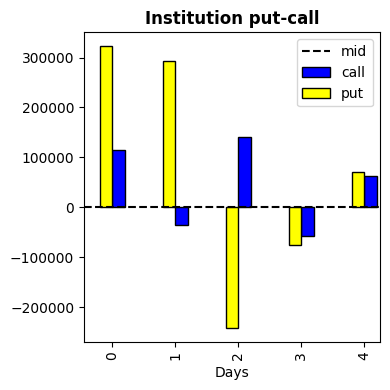

In [213]:

fig, ax = plt.subplots(figsize=(4, 4))  # Adjust the figure size as needed

# Plot pro_puts
tc.plot(kind='bar', color='blue', edgecolor='black', ax=ax, width=0.2, position=0, label='call')

# Plot pro_calls
tp.plot(kind='bar', color='yellow', edgecolor='black', ax=ax, width=0.2, position=1, label='put')

ax.set_title('Institution put-call', fontweight='bold')
ax.set_xlabel('Days')
ax.axhline(y=0, color='black', linestyle='--')
ax.legend(loc='upper right', labels=['mid', 'call','put'])

plt.tight_layout()
plt.show()